# Ensemble Techniques
Steps Performed : Ensemble Techniques with AutoEncoder dimensionality reduction as pre-processing 

A collection of several models working together on a single set is called an ensemble. The method is called Ensemble Learning. It is much more useful use all different models rather than any one.

Why ensembles?
1. Lower error
2. Less over-fitting
3. Better generalization 

# Pre-requisite:
    Ensure datafolder and required csv datafile is in place before running the code. 
	If you are running this notebook into Jupyter notebook, ensure to mount the drive and file exists on the drive.

In [2]:
#Modify the directory & File name based on your local paths & file name
dataFolder = "C:/Users/shaaruns.CORPDOM/Documents/BITS_Assignments/Module-7/Gr20_Cap4_Sourcecode/Grp20_Cohert3_Final_Submission"
datafile = "Output_CSV/Dataset_Step4_Processed_Data_Revised.csv"

In [3]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
print('pandas  : {}'.format(pd.__version__)) #Rationale 
import numpy as np
print ('numpy   : {}'.format(np.__version__))
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


pandas  : 0.25.1
numpy   : 1.19.4


In [6]:
#Read the dataset from clean datafile

df_train = pd.read_csv(dataFolder +'/' + datafile)
df_train.head()
#Read the dataset from GDrive
#Inputfile = 'drive/My Drive/Capstone_Files/Dataset_wrangling_Part_4_Post_Review.csv'
#df_train = pd.read_csv(Inputfile)
#df_train.head()



,Consumerdisputed,ComplaintID,Month_Received,Year_Sent,Month_Sent,Day_Sent,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,...,Feature109,Feature110,Feature111,Feature112,Feature113,Feature114,Feature115,Feature116,Feature117,Feature118
0,1,1347613,4,2015,4,26,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0
1,1,1685130,12,2015,12,7,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1,10631,1,2012,1,9,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1,1489180,7,2015,7,27,4,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1,795636,4,2014,4,6,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


# Feature Scaling of train Data Sets except Target and Indent variable

In [7]:
df_train.shape

(100311, 142)

In [8]:
df_train.columns

Index(['Consumerdisputed', 'ComplaintID', 'Month_Received', 'Year_Sent',
       'Month_Sent', 'Day_Sent', 'Week_Received', 'Product_Consumer Loan',
       'Product_Credit card', 'Product_Credit reporting',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=142)

In [9]:
df_train.rename(columns = {'Complaint ID':'ComplaintID'}, inplace = True)

In [10]:
temp = df_train.copy()

In [11]:
colsTobedropped = ['Consumerdisputed', 
                  'ComplaintID'
                             ]



temp  = temp.drop(colsTobedropped,axis = 1)
print(temp.columns)

Index(['Month_Received', 'Year_Sent', 'Month_Sent', 'Day_Sent',
       'Week_Received', 'Product_Consumer Loan', 'Product_Credit card',
       'Product_Credit reporting', 'Product_Debt collection',
       'Product_Mortgage',
       ...
       'Feature109', 'Feature110', 'Feature111', 'Feature112', 'Feature113',
       'Feature114', 'Feature115', 'Feature116', 'Feature117', 'Feature118'],
      dtype='object', length=140)


In [12]:
temp.shape

(100311, 140)

In [13]:
scaledCols = temp.columns

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train[scaledCols] = scaler.fit_transform(df_train[scaledCols])

In [15]:
df_train.shape

(100311, 142)

In [16]:
#Final X training Data
X = df_train.reindex(columns=scaledCols)

#Target Y Variable Consumer disputed as 0 or 1
y = df_train['Consumerdisputed'].values

#Preserving ComplaintID for providing final output results, will not be used for training data
p_ComplaintID = df_train['ComplaintID'].values

In [17]:
# Split the dataframe 80:20 preserve the distribution of class - use stratify

X_train, X_test, y_train, y_test , trainComplaintID , valComplaintID = train_test_split(X, y, p_ComplaintID , test_size = 0.2,random_state = 17 , stratify = df_train['Consumerdisputed'])


In [18]:
#checking y_train distribution
print("y_train distribution of label '1': {} \n".format(sum(y_train == 1))) 
print("y_train distribution of label '0': {} \n".format(sum(y_train == 0)))


#checking y_train distribution
print("y_test distribution of label '1': {} \n".format(sum(y_test == 1))) 
print("y_test distribution of label '0': {} \n".format(sum(y_test == 0)))

y_train distribution of label '1': 24541 

y_train distribution of label '0': 55707 

y_test distribution of label '1': 6136 

y_test distribution of label '0': 13927 



# Dimensional reduction and features selection¶

In [19]:
totalFeature = X_train.columns
len(totalFeature)

140

In [20]:
# Multilayer Perceptron
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
from tensorflow.keras.models import load_model

In [21]:
n_inputs = len(totalFeature)
# define encoder
visible = Input(shape=(n_inputs,))

#We will use batch normalization and leaky ReLU activation.
#The encoder to have two hidden layers, 
#The first with two times the number of inputs 
#The second with the same number of inputs 
#The bottleneck layer with the half the number of inputs as the dataset.

# encoder level 1
e = Dense(n_inputs*2)(visible)

#Batch normalization (also known as batch norm) is a method used to make artificial neural networks faster 
#and more stable through normalization of the input layer by re-centering and re-scaling.
e = BatchNormalization()(e)

#In the context of artificial neural networks, 
#the rectifier is an activation function defined as the positive part of its argument:
#f(x)=max(0,x) where x is the input to a neuron. 
e = LeakyReLU()(e)


# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)


# bottleneck
#The bottleneck layer with the half the number of inputs as the dataset.
n_bottleneck = round(float(n_inputs) / 2.0) #Half of the input 
bottleneck = Dense(n_bottleneck)(e)

In [22]:
#The decoder will be defined with a similar structure, although in reverse.
# define decoder, level 1

d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)

# output layer
output = Dense(n_inputs, activation='linear')(d)

# define autoencoder model
model = Model(inputs=visible, outputs=output)

In [23]:
# compile autoencoder model

#The model will be fit using the efficient Adam version of stochastic gradient descent and 
#minimizes the mean squared error, given that reconstruction is a type of multi-output regression problem.
model.compile(optimizer='adam', loss='mse')

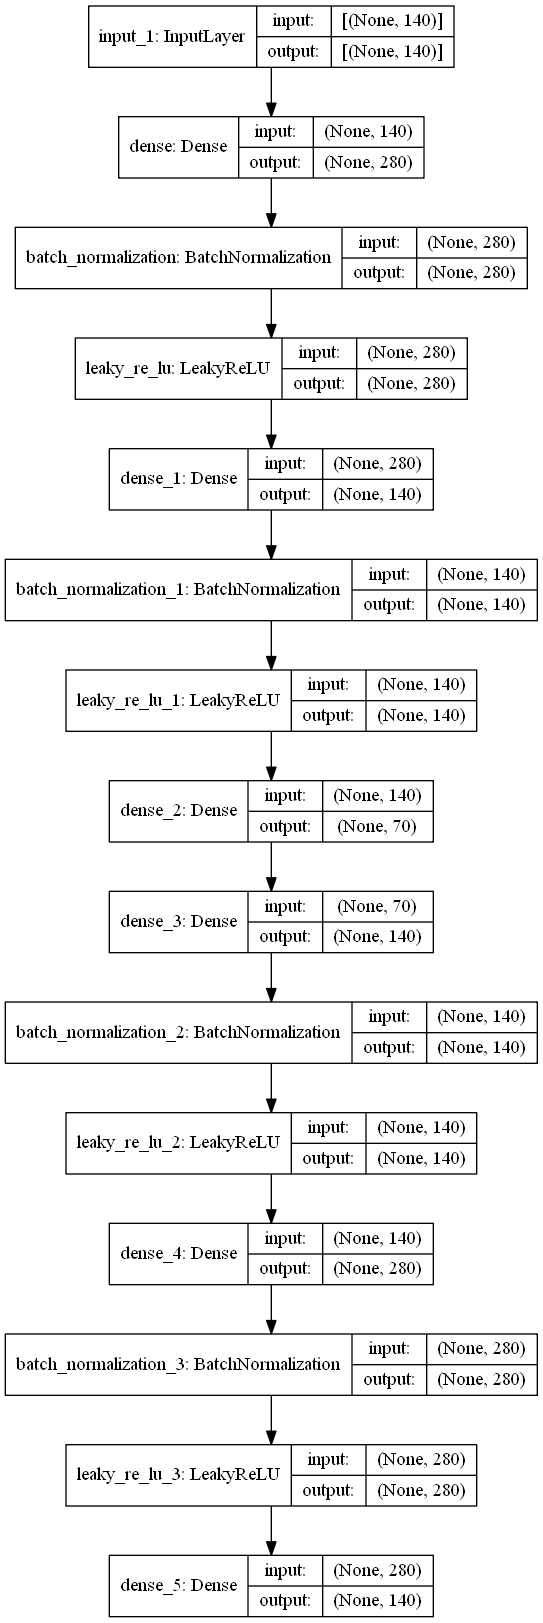

In [24]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)

In [25]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=200, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/200
5016/5016 - 33s - loss: 0.0056 - val_loss: 0.0011
Epoch 2/200
5016/5016 - 30s - loss: 0.0017 - val_loss: 7.5028e-04
Epoch 3/200
5016/5016 - 30s - loss: 0.0011 - val_loss: 0.0011
Epoch 4/200
5016/5016 - 30s - loss: 8.8817e-04 - val_loss: 0.0010
Epoch 5/200
5016/5016 - 30s - loss: 7.3972e-04 - val_loss: 5.6004e-04
Epoch 6/200
5016/5016 - 30s - loss: 5.9678e-04 - val_loss: 3.8856e-04
Epoch 7/200
5016/5016 - 30s - loss: 5.2999e-04 - val_loss: 3.6551e-04
Epoch 8/200
5016/5016 - 30s - loss: 4.5497e-04 - val_loss: 4.7883e-04
Epoch 9/200
5016/5016 - 30s - loss: 4.3300e-04 - val_loss: 3.2326e-04
Epoch 10/200
5016/5016 - 29s - loss: 3.8884e-04 - val_loss: 3.9980e-04
Epoch 11/200
5016/5016 - 30s - loss: 3.6968e-04 - val_loss: 3.4957e-04
Epoch 12/200
5016/5016 - 30s - loss: 3.4055e-04 - val_loss: 2.8561e-04
Epoch 13/200
5016/5016 - 30s - loss: 3.2639e-04 - val_loss: 2.7702e-04
Epoch 14/200
5016/5016 - 30s - loss: 3.1124e-04 - val_loss: 2.7464e-04
Epoch 15/200
5016/5016 - 30s - loss: 2.

Epoch 117/200
5016/5016 - 31s - loss: 9.4218e-05 - val_loss: 1.4570e-04
Epoch 118/200
5016/5016 - 32s - loss: 9.5269e-05 - val_loss: 1.4727e-04
Epoch 119/200
5016/5016 - 31s - loss: 1.0127e-04 - val_loss: 1.5013e-04
Epoch 120/200
5016/5016 - 32s - loss: 9.2175e-05 - val_loss: 1.2786e-04
Epoch 121/200
5016/5016 - 31s - loss: 9.5750e-05 - val_loss: 2.1835e-04
Epoch 122/200
5016/5016 - 31s - loss: 9.4341e-05 - val_loss: 1.7302e-04
Epoch 123/200
5016/5016 - 32s - loss: 1.0235e-04 - val_loss: 1.3021e-04
Epoch 124/200
5016/5016 - 32s - loss: 9.8460e-05 - val_loss: 1.6705e-04
Epoch 125/200
5016/5016 - 32s - loss: 9.4799e-05 - val_loss: 1.4972e-04
Epoch 126/200
5016/5016 - 31s - loss: 9.6622e-05 - val_loss: 1.7654e-04
Epoch 127/200
5016/5016 - 31s - loss: 9.6662e-05 - val_loss: 2.3548e-04
Epoch 128/200
5016/5016 - 31s - loss: 9.1532e-05 - val_loss: 1.5263e-04
Epoch 129/200
5016/5016 - 32s - loss: 9.5354e-05 - val_loss: 1.4872e-04
Epoch 130/200
5016/5016 - 31s - loss: 9.1577e-05 - val_loss: 1.5

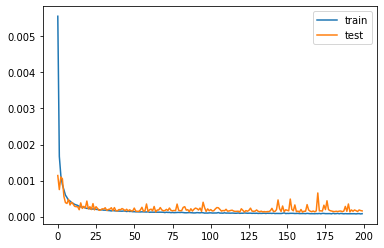

In [26]:
#After training, we can plot the learning curves for the train and test sets to confirm the model learned the 
#reconstruction problem well

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [27]:
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_no_compress.png', show_shapes=True)

# save the encoder to file
encoder.save('encoder.h5')

In [28]:
# load the model from file
encoder = load_model('encoder.h5')

In [29]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

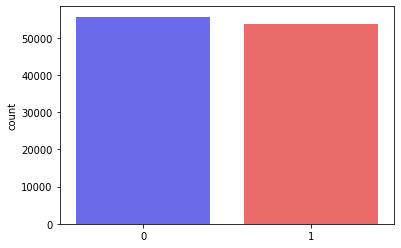

In [30]:
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
x_train_res, y_train_res = oversample.fit_resample(X_train_encode, y_train)
sns.countplot(x=y_train_res, palette='seismic');

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt


In [32]:
def plot_roc_curve(model, yTest, yPred):
    fpr, tpr, thresholds = roc_curve(yTest, yPred)
    roc_auc = auc(fpr, tpr)
    lw = 2
    #print('AUC area:', roc_auc)
    Model_accuracy[model] = roc_auc_score(yTest,yPred)
    print('AUC roc_auc_score:', roc_auc_score(yTest,yPred))
    plt.plot([0,1],[0,1],'k--')
    #plt.plot(fpr,tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title(model)
    plt.show()

def getModelReport(modelName, yTest, yPredict) :
    accuracy = accuracy_score(yTest, yPredict)
    precision = precision_score(yTest, yPredict)
    recall = recall_score(yTest, yPredict)
    f1 = f1_score(yTest, yPredict)
    conf_matrix = confusion_matrix(yTest, yPredict)
    clf_report = classification_report(yTest, yPredict)

    print('\n\n*************************************************************************************')
    print('FOR {0}:'.format(modelName))
    print('ACCURACY:', accuracy)
    print('F1 SCORE:', f1)
    print('CONFUSION MATRIX: ')
    print(conf_matrix)
    print('CLASSIFICATION REPORT: ')
    print(clf_report)
    print('****************************************************************************************')


In [33]:
 
def write_predictions_to_csv(dataToWrite, file):
    fullAttrList = dataToWrite.keys()
    dfToWrite = pd.DataFrame( columns = fullAttrList)
    for key,val in dataToWrite.items():
        dfToWrite[key] = val
    dfToWrite.to_csv(file, index=False)    

In [34]:
SKLearn_Model_Data = {}
Model_accuracy = {}

In [35]:
print (x_train_res.shape)
print (X_test_encode.shape)
print (y_train_res.shape)
print (y_test.shape)

(109464, 63)
(20063, 63)
(109464,)
(20063,)


In [36]:
def classification_report_csv(algo_name,y_test, y_predicted):
    #df_header = header_line_csv(algo_name)
    report = classification_report(y_test, y_predicted, output_dict=True,target_names=['Consumer Not Disputed', 'Consumer Disputed'])
    df = pd.DataFrame(report).transpose()
    df.insert(loc=0, column='Algorithm Name', value=algo_name)
    return df

Training Accuracy:  0.5767466929766863
Testing Accuarcy:  0.4938942331655286
              precision    recall  f1-score   support

           0       0.74      0.42      0.54     13927
           1       0.33      0.66      0.44      6136

    accuracy                           0.49     20063
   macro avg       0.53      0.54      0.49     20063
weighted avg       0.61      0.49      0.51     20063



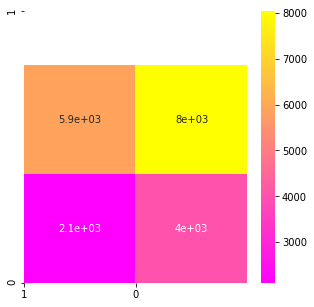

In [37]:
# Random Forest Classifier

from imblearn.ensemble import BalancedRandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 
df_final = pd.DataFrame()

model = BalancedRandomForestClassifier(n_estimators = 100, random_state = 0)
model.fit(x_train_res, y_train_res)
y_pred_rf = model.predict(X_test_encode)

print("Training Accuracy: ", model.score(x_train_res, y_train_res))
print('Testing Accuarcy: ', model.score(X_test_encode, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

df = classification_report_csv("BalancedRandomForestClassifier",y_test,  y_pred_rf)
df_final= pd.concat([df_final,df])

AUC roc_auc_score: 0.5390444051769663


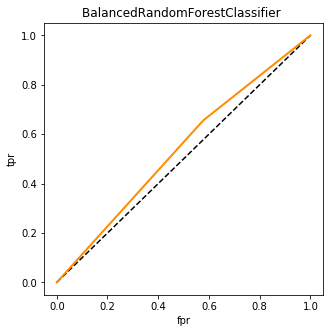

In [38]:
plot_roc_curve("BalancedRandomForestClassifier ",y_test,  y_pred_rf)

Training Accuracy:  0.574855660308412
Testing Accuarcy:  0.49663559786671985
              precision    recall  f1-score   support

           0       0.73      0.43      0.54     13927
           1       0.33      0.65      0.44      6136

    accuracy                           0.50     20063
   macro avg       0.53      0.54      0.49     20063
weighted avg       0.61      0.50      0.51     20063



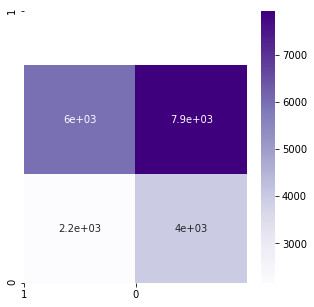

In [39]:
# Random Forest with Bagging Classifier

from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
                 

model2 = BalancedBaggingClassifier(base_estimator = RandomForestClassifier(),
                                 sampling_strategy = 'auto',
                                 replacement = False,
                                 random_state = 0)

model2.fit(x_train_res, y_train_res)


print("Training Accuracy: ", model2.score(x_train_res, y_train_res))

print('Testing Accuarcy: ', model2.score(X_test_encode, y_test))

y_pred_bc = model2.predict(X_test_encode)
# making a classification report
cr = classification_report(y_test,  y_pred_bc)
print(cr)
df = classification_report_csv("BalancedBaggingClassifier",y_test,  y_pred_bc)
df_final= pd.concat([df_final,df])
# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_bc)
sns.heatmap(cm, annot = True, cmap = 'Purples')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()


AUC roc_auc_score: 0.5389220850216472


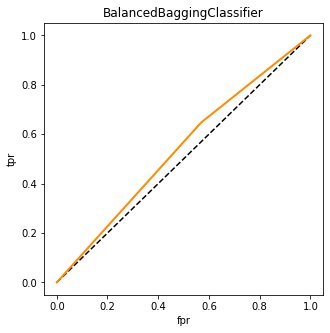

In [40]:
plot_roc_curve("BalancedBaggingClassifier",y_test,  y_pred_bc)

Training Accuracy:  0.551624278301542
Testing Accuarcy:  0.5241489308677665
              precision    recall  f1-score   support

           0       0.73      0.50      0.59     13927
           1       0.34      0.59      0.43      6136

    accuracy                           0.52     20063
   macro avg       0.54      0.54      0.51     20063
weighted avg       0.61      0.52      0.54     20063



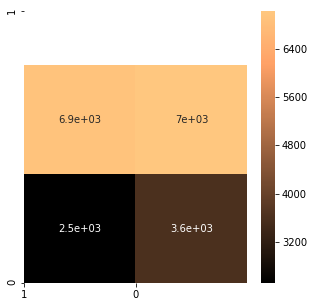

In [41]:
# Easy Ensemble Classifier

from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
                 

model1 = EasyEnsembleClassifier(n_estimators = 100, random_state = 0)

model1.fit(x_train_res, y_train_res)
y_pred_ef = model1.predict(X_test_encode)

print("Training Accuracy: ", model1.score(x_train_res, y_train_res))
print('Testing Accuarcy: ', model1.score(X_test_encode, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_ef)
print(cr)
df = classification_report_csv("EasyEnsembleClassifier",y_test,  y_pred_ef)
df_final= pd.concat([df_final,df])

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred_ef)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

AUC roc_auc_score: 0.5421012447190412


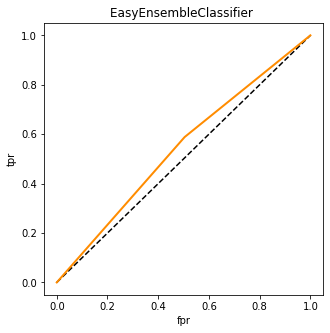

In [42]:
plot_roc_curve("EasyEnsembleClassifier ",y_test,  y_pred_ef)

(20063,)
(20063,)
              precision    recall  f1-score   support

           0       0.73      0.43      0.54     13927
           1       0.33      0.65      0.44      6136

    accuracy                           0.50     20063
   macro avg       0.53      0.54      0.49     20063
weighted avg       0.61      0.50      0.51     20063



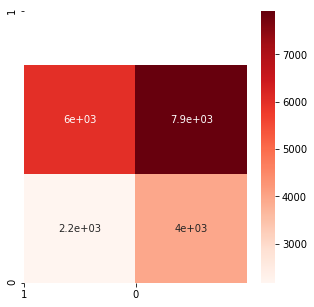

In [43]:
# boosting

y_pred = y_pred_rf*0.5 + y_pred_ef*0.2 + y_pred_bc*0.3

y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# making a classification report
print (y_test.shape)
print (y_pred.shape)
cr = classification_report(y_test,  y_pred)
print(cr)
df = classification_report_csv("Boosting",y_test,  y_pred)
df_final= pd.concat([df_final,df])
# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'Reds')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

AUC roc_auc_score: 0.5386622790244794


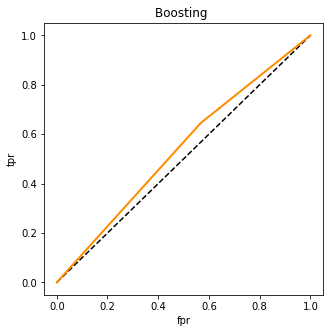

In [44]:
plot_roc_curve("Boosting ",y_test,y_pred)

In [45]:
print (y_test.shape)
print (y_pred.shape)

(20063,)
(20063,)


# Voting Classifier
Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.

Hard voting : The simplest case of majority voting. In this case, the class that received the highest number of votes Nc​(y​​t) will be chosen. Here we predict the class label y^ via majority voting of each classifier.

Soft voting : In this case, the probability vector for each predicted class (for all classifiers) are summed up &averaged. The winning class is the one corresponding to the highest value (only recommended if the classifiers are well calibrated).


In [46]:
from sklearn.ensemble import VotingClassifier
from imblearn.ensemble import BalancedBaggingClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier 
from imblearn.ensemble import EasyEnsembleClassifier 

vote_est = [ 
    ('brf', BalancedRandomForestClassifier()),
    ('bc', BalancedBaggingClassifier()),
    ('eec',EasyEnsembleClassifier())]

voting = VotingClassifier(estimators = vote_est , voting = 'soft')


voting.fit(x_train_res, y_train_res)

y_pred = voting.predict(X_test_encode).astype(int)



              precision    recall  f1-score   support

           0       0.73      0.43      0.54     13927
           1       0.33      0.65      0.44      6136

    accuracy                           0.50     20063
   macro avg       0.53      0.54      0.49     20063
weighted avg       0.61      0.50      0.51     20063



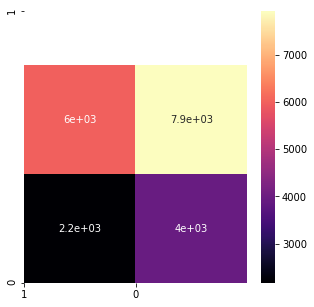

In [47]:
import matplotlib.pyplot as plt
# making a classification report
cr = classification_report(y_test,y_pred)
print(cr)
df = classification_report_csv("VotingClassifier",y_test,y_pred)
df_final= pd.concat([df_final,df])

# making a confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, cmap = 'magma')
plt.xticks([0,1],labels=[1,0])
plt.yticks([-0.5,2.0],labels=[1,0])
plt.show()

AUC roc_auc_score: 0.5384468701065501


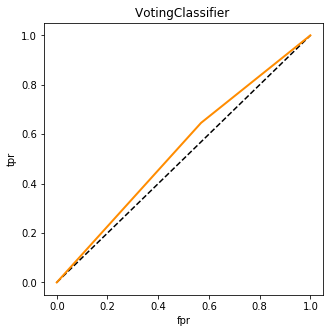

In [48]:
plot_roc_curve("VotingClassifier ",y_test,y_pred)

In [49]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("AutoEncoder_Ensemble_Output.xlsx", engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_final.to_excel(writer, sheet_name="AutoEncoder_Ensemble_Output")

# Close the Pandas Excel writer and output the Excel file.
writer.save()